In [1]:
from abc import ABC, abstractmethod

import matplotlib.pyplot as plt
import numpy as np

In [2]:
class IterativePrisionerDilemma:
    def __init__(self, N, payoff_CC, payoff_CD, payoff_DC, payoff_DD):
        self.N = N
        self.payoff_CC = payoff_CC
        self.payoff_CD = payoff_CD
        self.payoff_DC = payoff_DC
        self.payoff_DD = payoff_DD
        self.history = np.nan * np.ones((self.N, 3))
        
    def _get_outcome(self, move_A, move_B):
        if move_A == 0 and move_B == 0:
            return 0
        elif move_A == 0 and move_B == 1:
            return 1
        elif move_A == 1 and move_B == 0:
            return 2
        elif move_A == 1 and move_B == 1:
            return 3
        
    def _compute_payoff(self, player_A, player_B):
        player_A.payoff = (self.payoff_CC * np.sum(self.history[:, 2] == 0) + 
                           self.payoff_CD * np.sum(self.history[:, 2] == 1) +
                           self.payoff_DC * np.sum(self.history[:, 2] == 2) +
                           self.payoff_DD * np.sum(self.history[:, 2] == 3))
        
        player_B.payoff = (self.payoff_CC * np.sum(self.history[:, 2] == 0) + 
                           self.payoff_CD * np.sum(self.history[:, 2] == 2) +
                           self.payoff_DC * np.sum(self.history[:, 2] == 1) +
                           self.payoff_DD * np.sum(self.history[:, 2] == 3))
        
    def run(self, player_A, player_B, verbose=True):
        for turn in range(self.N):
            move_A = player_A.get_action(self.history[:turn, 1])
            move_B = player_B.get_action(self.history[:turn, 0])
            outcome = self._get_outcome(move_A, move_B)
            self.history[turn, 0] = move_A
            self.history[turn, 1] = move_B
            self.history[turn, 2] = outcome
        
        self._compute_payoff(player_A, player_B)



In [3]:
class Strategy(ABC):
    def __init__(self):
        self.payoff = None
    
    @abstractmethod
    def get_action(self):
        pass


class TitForTat(Strategy):
    def __init__(self):
        super().__init__()
    
    def get_action(self, history):
        if history.size != 0:
            if history[-1] == 1:
                return 1
            return 0
        else:
            return 0

class AlwaysDefect(Strategy):
    def __init__(self):
        super().__init__()
    
    def get_action(self, history):
        return 1
    
    
class AlwaysCooperate(Strategy):
    def __init__(self):
        super().__init__()
        
    def get_action(self, history):
        return 0

    
class Random(Strategy):
    def __init__(self):
        super().__init__()
        
    def get_action(self, history):
        if np.random.random() > 0.5:
            return 0
        return 1
    
class Friedman(Strategy):
    def __init__(self):
        super().__init__()
        self.cooperate = True
        
    def get_action(self, history):
        if self.cooperate:
            if 1 not in history:
                return 0
            self.cooperate = False
        return 1
    
class DavisCuny(Strategy):  # Check
    def __init__(self):
        super().__init__()
        self.counter = 10
        self.cooperate = True
    
    def get_action(self, history):
        if self.counter > 0:
            self.counter -= 1
            if self.counter == 0 and 1 in history:
                self.cooperate = False
                return 1
            return 0
        if not self.cooperate:
            return 1
        return 0
        
        
class Shubik(Strategy):
    def __init__(self):
        super().__init__()
        
    def get_action(self, history):
        if history.size == 0:
            return 0
        if history[-1] == 0:
            return 0
        else:
            return 1
        
class Joss(Strategy):
    def __init__(self):
        super().__init__()
        
    def get_action(self, history):
        if history.size == 0:
            return 0
        if history[-1] == 0:
            return 0 if np.random.random() > 0.1 else 1
        return 1
    

class Feld(Strategy):
    def __init__(self):
        super().__init__()
        self.p_coop = 1
        
    def get_action(self, history):
        if history.size == 0:
            return 0
        self.p_coop -= self.p_coop / 200 #######################
        if history[-1] == 1:
            return 1
        return 0 if np.random.random() > (1 - self.p_coop) else 1

In [4]:
player1 = TitForTat()
player5 = Shubik()
player7 = Friedman()
player8 = DavisCuny()
player11 = Feld()
player12 = Joss()
player15 = Random()

#player2 = AlwaysCooperate()
#player3 = AlwaysDefect()

players = [player1, player5, player7, player8, player11, player12, player15]
names = ['TitForTat', 'Shubik', 'Friedman', 'DavisCuny', 'Feld',
         'Joss', 'Random']
num_players = len(players)

results = np.nan * np.ones((num_players, num_players))

game = IterativePrisionerDilemma(N=200, payoff_CC=3, payoff_CD=0, payoff_DC=5, payoff_DD=1)

for i in range(num_players):
    for j in range(i, num_players):
        game.run(players[i], players[j])
        results[i, j] = players[i].payoff
        results[j, i] = players[j].payoff
        
cumulative = results.sum(axis=1) / len(players)

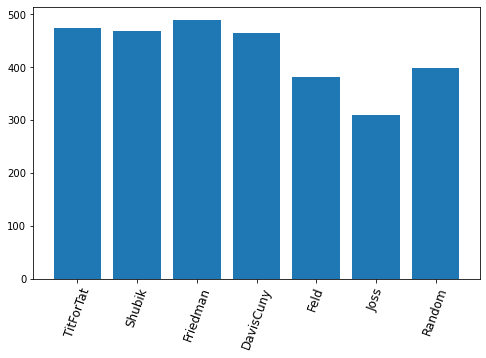

In [5]:
plt.figure(figsize=(8, 5))
plt.bar(names, cumulative)
plt.xticks(fontsize=12, rotation=70)
plt.show()